<a href="https://colab.research.google.com/github/JakubPyt/Sea_Level_Predictor/blob/main/Sea_Level_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sea Level Predictor

This project was created as part of the course on the free Code Camp website:

https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/sea-level-predictor

In this project, I have to analyze a dataset of the global average sea level change since 1880. I have to use the data to predict the sea level change through year 2050.

In [1]:
# Import of needed libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Import the data 
url = 'https://raw.githubusercontent.com/JakubPyt/Sea_Level_Predictor/main/epa-sea-level.csv'
data = pd.read_csv(url, sep=';')

# Display first five rows
data.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


## Plot: Rise of the Sea Level

Requirements:
- Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.
- Use the `linregress` function from `scipy.stats` to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
- Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
- The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise of the Sea Level".

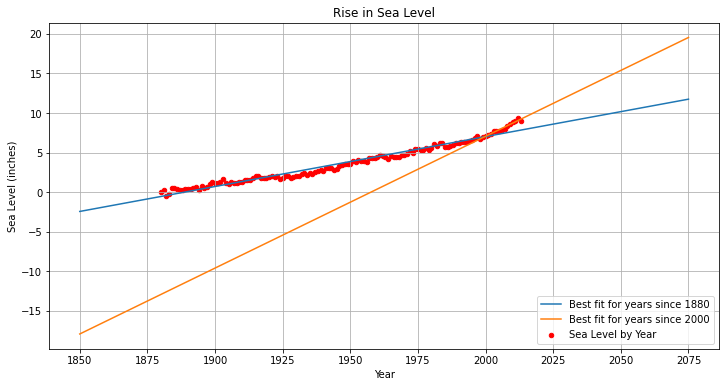

In [ ]:
# ===================
# Create scatter plot
# ===================
fig = plt.figure(figsize=(12,6))

# Years which should be on plot
years=[1850, 1875, 1900, 1925, 1950, 1975, 2000, 2025, 2050, 2075]

# Create scatter plot
plt.scatter(
    x=data['Year'],  # Years from dataset
    y=data['CSIRO Adjusted Sea Level'],  # Sea level from dataset
    s=20,  # Size of markers
    c='red',  # Color of markers
    label="Sea Level by Year"
)

# Set titles
plt.title('Rise of the Sea Level')  
plt.xlabel('Year')  
plt.ylabel('Sea Level (inches)')

# Set values displayed on x label
plt.xticks(years)

# Display grid
plt.grid()

# ===================
# Create first line of best fit
# ===================
# This line show best fit to data from dataset
# First, we have to calculate parameters for best fit based on data from dataset
line1 = linregress(data['Year'], data['CSIRO Adjusted Sea Level'])

# Now we can calculate position of line based on years in plot
line1_plot = [line1.slope*xi + line1.intercept for xi in years]

# Display line
plt.plot(
    years, 
    line1_plot, 
    label='Best fit for years since 1880'
)

# ===================
# Create second line of best fit
# ===================
# This line show best fit to data since 2000
# Get years and values from basic dataset
years_from_2000 = data[data['Year'] > 2000]

# As above
line2 = linregress(years_from_2000['Year'], years_from_2000['CSIRO Adjusted Sea Level'])
line2_plot = [line2.slope*xi + line2.intercept for xi in years]
plt.plot(
    years, 
    line2_plot, 
    label='Best fit for years since 2000'
)

# Display legend
plt.legend(
    loc='lower right'
)

# Show plot
plt.show()